# 3.1. 3 신경망에서의 단어 처리

In [3]:
import numpy as np

C = np.array([[1, 0, 0, 0, 0, 0, 0]])
W = np.random.randn(7,3)
h = np.matmul(C,W)

print(h)

[[-1.14674466 -0.35510831  0.28385243]]


In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Colab Notebooks
from common.layers import MatMul

/content/drive/MyDrive/Colab Notebooks


In [7]:
import numpy as np
from common.layers import MatMul

c = np.array([[1, 0, 0, 0, 0, 0, 0]])
W = np.random.randn(7,3)
print("W")
print(W)
layer = MatMul(W)
h = layer.forward(c)
print("h")
print(h)

W
[[ 0.0050908  -0.28458959 -0.93007342]
 [ 0.01239637  0.89182071  0.25261198]
 [ 0.13063096 -0.07293416 -1.53813089]
 [ 1.57164633 -1.60409908  2.23135559]
 [-0.38751376  0.65835589 -0.54983194]
 [-2.175994   -0.68660427  0.07411254]
 [-0.19813343 -1.52622816 -1.69798925]]
h
[[ 0.0050908  -0.28458959 -0.93007342]]


# 3. 2. 1 CBOW 모델의 추론

In [ ]:
import numpy as np

from common.layers import MatMul

c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

W_in = np.random.randn(7,3)
W_out = np.random.randn(3,7)

in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)

print(s)

[[ 0.00953167  0.55289858  0.26224963  0.38361722 -1.72242346 -0.42464941
  -0.54395446]]


In [ ]:
from common.util import preprocess

text = 'You say goodbye and I say hello.'

corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [8]:
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size:-window_size]
    contexts = []

    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)

    return np.array(contexts), np.array(target)


In [12]:
contexts, target = create_contexts_target(corpus, window_size=1)
print("contexts")
print(contexts)
print("target")
print(target)

contexts
[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
target
[1 2 3 4 1 5]


In [9]:
from common.util import *

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print("corpus = ", corpus)
print("word_to_id = ", word_to_id)
print("id_to_word = ", id_to_word)
contexts, target = create_contexts_target(corpus, window_size = 1)
print("contexts = ")
print(contexts)
print("target = ")
print(target)
vocab_size = len(word_to_id)
print("vocab_size = ", vocab_size)
target = convert_one_hot(target, vocab_size)
print("target = ")
print(target)
contexts = convert_one_hot(contexts, vocab_size)
print("contexts = ")
print(contexts)

corpus =  [0 1 2 3 4 1 5 6]
word_to_id =  {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
id_to_word =  {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
contexts = 
[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
target = 
[1 2 3 4 1 5]
vocab_size =  7
target = 
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]
contexts = 
[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]]


In [ ]:
import numpy as np

from common.layers import *

class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size


        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H,V).astype('f')


        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()


        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []

        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads



        self.word_vecs_in = W_in
        self.word_vecs_out = W_out.T
        self.word_vecs_in_out = np.dot(W_in,W_out)

        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:,0])
        h1 = self.in_layer1.forward(contexts[:,1])
        h = (h0+h1)*0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss


    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None





| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

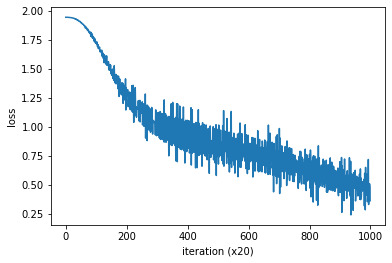

In [ ]:
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import *


window_size = 1
hidden_size = 5
batch_size = 3

max_epoch = 1000

text = 'You say goodbay and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)


vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)

optimizer = Adam()

trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [ ]:
word_vecs_in = np.round(model.word_vecs_in, 7)
word_vecs_out = np.round(model.word_vecs_out, 7)
word_vecs_in_out = np.round(model.word_vecs_in_out, 6)

print("입력층만 사용")
for word_id, word in id_to_word.items():
    print("%10s" %word, end='')
    print(word_vecs_in[word_id])
print("-"*100)

print("출력층만 사용")
for word_id, word in id_to_word.items():
    print("%10s" %word, end='')
    print(word_vecs_out[word_id])
print("-"*100)

print("입력, 출력층 사용")
for word_id, word in id_to_word.items():
    print("%10s" %word, end='')
    print(word_vecs_in_out[word_id])
print("-"*100)

입력층만 사용
       you[0.8513937 1.708218  0.9159266 0.8911793 1.0038893]
       say[-1.058694   1.2880182 -1.0859127 -1.1010803 -1.1695771]
   goodbay[ 1.0876231 -0.4254515  1.0040371  1.0861477  0.9404498]
       and[-1.4319615  1.4254465 -1.4059659  0.8598523 -1.0987701]
         i[ 1.0850066 -0.4390232  1.0085658  1.1031796  0.9457329]
     hello[0.8573254 1.7113802 0.9079402 0.8938583 0.9881493]
         .[ 0.1057383  0.4530358 -0.098149  -1.8617274 -0.8310957]
----------------------------------------------------------------------------------------------------
출력층만 사용
       you[-0.1286217 -1.4844186 -0.1087333 -0.5952194  0.1541482]
       say[0.7738865 1.6303121 0.8084951 0.7329226 0.8808363]
   goodbay[-0.7474978  0.3625447 -0.7364344 -0.258424  -0.6073534]
       and[ 0.8438582 -1.8732086  0.7735643  0.763747   0.7648058]
         i[-0.7470992  0.3742364 -0.7297212 -0.2644228 -0.5988873]
     hello[-0.3661643  0.1635521 -0.4427505 -1.3879355 -0.5976234]
         .[-0.1168203 -1.48

# skip - Gram

In [ ]:
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        
        self.word_vecs_in = W_in
        self.word_vecs_out = W_out.T
        self.word_vecs_in_out = np.dot(W_in,W_out)

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None


| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.87
| 에폭 26 |

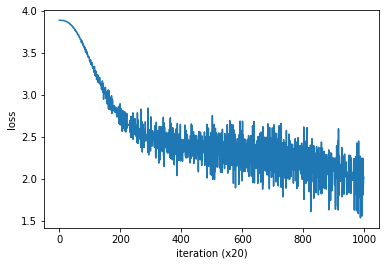

In [ ]:
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import *


window_size = 1
hidden_size = 5
batch_size = 3

max_epoch = 1000

text = 'You say goodbay and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)


vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)

optimizer = Adam()

trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [ ]:
word_vecs_in = np.round(model.word_vecs_in, 7)
word_vecs_out = np.round(model.word_vecs_out, 7)
word_vecs_in_out = np.round(model.word_vecs_in_out, 6)

print("입력층만 사용")
for word_id, word in id_to_word.items():
    print("%10s" %word, end='')
    print(word_vecs_in[word_id])
print("-"*100)

print("출력층만 사용")
for word_id, word in id_to_word.items():
    print("%10s" %word, end='')
    print(word_vecs_out[word_id])
print("-"*100)

print("입력, 출력층 사용")
for word_id, word in id_to_word.items():
    print("%10s" %word, end='')
    print(word_vecs_in_out[word_id])
print("-"*100)

입력층만 사용
       you[ 0.0012663  0.0030972 -0.0032027  0.0044708 -0.0012581]
       say[ 0.7242009 -0.8489674  0.2643753 -0.0169009 -0.422279 ]
   goodbay[-0.8570109  1.0618098 -0.8603023  1.071659   0.6889652]
       and[ 1.0639384 -0.9807959  1.1910454 -1.2554038 -1.1991483]
         i[-0.8815766  1.0572718 -0.8549616  1.0657537  0.6820963]
     hello[-0.7357958 -0.291565  -0.7663324 -0.3046625  1.2787765]
         .[ 0.0063226 -0.0058628  0.0023755  0.0045022 -0.0099534]
----------------------------------------------------------------------------------------------------
출력층만 사용
       you[ 0.5513107 -0.5978702  0.3871916 -0.2810832 -0.4789296]
       say[-1.0116081  0.8793504 -1.0117942  0.8281898  1.1170425]
   goodbay[ 0.7187084 -0.6509692  0.8802339 -0.9464981 -0.8666332]
       and[-0.770663   1.3023082 -0.7193035  1.2694038  0.3686294]
         i[ 0.7219984 -0.6463825  0.8670705 -0.9296918 -0.8962539]
     hello[ 0.546355  -0.5938188  0.3959251 -0.2798148 -0.4854108]
         .[-